Taller 1
Finanzas computacionales


Estudiantes:

Laura Sofía Calderón Sterling 

Janny Valentina Corredor Mora


In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pandas_datareader.data as pdr
import datetime
import warnings
warnings.filterwarnings("ignore")
!pip install --quiet yfinance
import yfinance as yf
yf.pdr_override()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.0 MB/s eta 0:00:00


Punto 1: Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando pandas datareader. Con esta información:

a. Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los resultados en una tabla.

b. Calcule los retornos esperados y volatilidades anualizadas.

c. Construya una tabla resumen con las estadísticas descriptivas de las series diarias (media, mediana, desv. estándar, curtosis, simetría) de los dos activos.

d. Compare las distribuciones empíricas de los dos activos con la distribución teórica normal.

e. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.

f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos.

In [2]:
#Tickers 
tickers = ['V','F']
# Fechas: desde 01/01/2021 hasta 12/31/2022.
start_date = '2021-01-01'
end_date = '2022-12-31'
acciones = pdr.DataReader(tickers, start="2021-01-01", end="2022-12-31")["Adj Close"]
acciones

[*********************100%***********************]  2 of 2 completed


,F,V
Date,,
2021-01-04,7.722801,214.385742
2021-01-05,7.840637,211.186096
2021-01-06,8.012858,209.325363
2021-01-07,8.212275,210.496918
2021-01-08,8.157889,212.111526
...,...,...
2022-12-23,10.686316,205.427643
2022-12-27,10.535805,205.886734
2022-12-28,10.300631,204.589294


In [3]:
#Diarios
retornos_diarios = np.log(acciones/acciones.shift()).dropna()
pd.DataFrame(retornos_diarios)

,F,V
Date,,
2021-01-05,0.015143,-0.015037
2021-01-06,0.021727,-0.008850
2021-01-07,0.024582,0.005581
2021-01-08,-0.006644,0.007641
2021-01-11,0.032790,-0.011953
...,...,...
2022-12-23,0.004411,0.003748
2022-12-27,-0.014185,0.002232
2022-12-28,-0.022574,-0.006322


In [4]:
#Mensuales 
retornos_mensuales = retornos_diarios.mean()*21
pd.DataFrame(retornos_mensuales)

,0
F,0.014569
V,-0.001395


In [5]:
#Anualizados
retornos_anualizados = retornos_diarios.mean()*252
pd.DataFrame(retornos_anualizados)

,0
F,0.174832
V,-0.016741


In [7]:
#Tabla 
tabla = pd.concat([retornos_mensuales,retornos_anualizados], axis = 1)
tabla.set_axis(['Retornos mensuales', 'Retornos anualizados'], axis=1)

,Retornos mensuales,Retornos anualizados
F,0.014569,0.174832
V,-0.001395,-0.016741


In [6]:
#Retornos esperados
retornos_esperados = retornos_diarios.mean() 
retornos_esperados 

F    0.000694
V   -0.000066
dtype: float64

In [ ]:
#Retornos esperados anualiados
retornos_esperados = retornos_diarios.mean()*252
retornos_esperados 

F    0.174832
V   -0.016741
dtype: float64

In [ ]:
#Volatilidades anualizadas
sigma = retornos_diarios.std()*np.sqrt(252)
sigma

F    0.457040
V    0.276901
dtype: float64

In [ ]:
#Tabla resumen
media_acciones = acciones.mean()
pd.DataFrame(media_acciones)

,0
F,13.316699
V,212.607327


In [ ]:
std_acciones = acciones.std()
pd.DataFrame(std_acciones)


,0
F,2.752841
V,13.913533


In [ ]:
mediana_acciones = acciones.median()
pd.DataFrame(mediana_acciones)


,0
F,12.665152
V,212.102310


In [ ]:
curtosis_acciones = acciones.kurt()
pd.DataFrame(curtosis_acciones)

,0
F,1.041467
V,-0.240897


In [ ]:
asimetria_acciones = acciones.skew()
pd.DataFrame(asimetria_acciones)

,0
F,1.055949
V,-0.064048


In [ ]:
#Tabla resumen estadisticas descriptivas de la serie diaria
tabla_resumen = pd.concat([media_acciones,std_acciones,mediana_acciones,curtosis_acciones,asimetria_acciones], axis = 1)
tabla_resumen.set_axis(['Media', 'Desviacion_Estandar', 'Mediana','Kurtosis','Asimetria'], axis=1)

,Media,Desviacion_Estandar,Mediana,Kurtosis,Asimetria
F,13.316699,2.752841,12.665152,1.041467,1.055949
V,212.607327,13.913533,212.102310,-0.240897,-0.064048


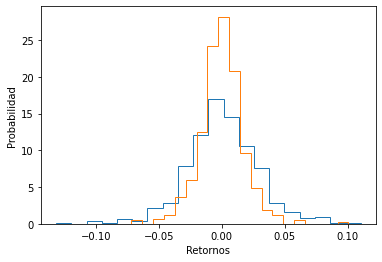

In [ ]:
#Comparación con immpira-normal 
plt.hist(retornos_diarios['F'], bins=20,density=True, histtype="step");
plt.hist(retornos_diarios['V'], bins=20,density=True, histtype="step");
#RIESGO DE COLA
plt.xlabel("Retornos")
plt.ylabel("Probabilidad");

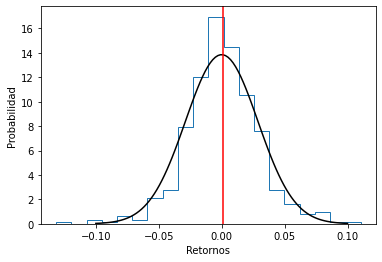

In [ ]:
#FORD
from scipy.stats import norm
x = np.linspace(-0.1,0.1, num=100) #Secuencia 
plt.hist(retornos_diarios['F'], bins=20,density=True, histtype="step")
plt.plot(x,norm.pdf(x,scale=retornos_diarios['F'].std()),'k')
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.axvline(retornos_diarios['F'].mean(),color='r'); 

#Con esto se puede invalidar el supuesto de normalidad. Los datos historicos no se ajustan a una distribución normal

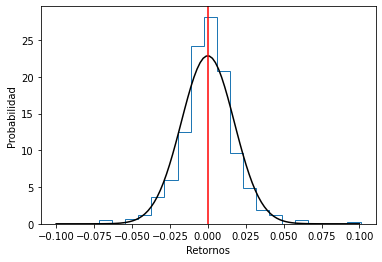

In [ ]:
#VISA
from scipy.stats import norm
x = np.linspace(-0.1,0.1, num=100) #Secuencia 
plt.hist(retornos_diarios['V'], bins=20,density=True, histtype="step")
plt.plot(x,norm.pdf(x,scale=retornos_diarios['V'].std()),'k')
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.axvline(retornos_diarios['V'].mean(),color='r'); #se le trazó la media

#Con esto se puede invalidar el supuesto de normalidad. Los datos historicos no se ajustan a una distribución normal

In [ ]:
#Matriz de correlación de Pearson 
retornos_diarios['F'].corr(retornos_diarios['V'],method="pearson")

0.36035198693256915

In [ ]:
#Matriz de correlación de Rango de Kendall
retornos_diarios['F'].corr(retornos_diarios['V'], method='kendall')

0.27201406085277796

In [ ]:
#Matriz de correlación de Spearman
retornos_diarios['F'].corr(retornos_diarios['V'], method='spearman')

0.39311075738194867

In [ ]:
#Pruebas de normalidad Kolmogorov-Smirnov

Punto 2. Escoga 10 acciones y con esa información:

a. Descargar series de precios mensuales de diciembre de 2017 a diciembre de 2022.

b. Calcular retornos y volatilidades anualizadas. 

c. Tabular ranking de los retornos esperados

In [ ]:
#Si quisiera hacer el punto 2 con pandas reader. Paso 1. Descargar precios y calcular retornos
tickers_1 = ["BAC","DIS","CPB","CVS","PZZA","XOM","ET","META","BBVA","MCD"]
acciones_1 = pdr.DataReader(tickers_1, start="2017-12-01", end="2022-12-31",interval="1Mo")["Adj Close"]
ret=np.log(acciones_1/acciones_1.shift(1)).dropna()
ret

[*********************100%***********************]  10 of 10 completed


,BAC,BBVA,CPB,CVS,DIS,ET,MCD,META,PZZA,XOM
Date,,,,,,,,,,
2018-01-01,0.080668,0.099579,-0.032963,0.081929,0.018744,0.058509,-0.005710,0.057426,0.145380,0.042829
2018-02-01,0.003120,-0.120983,-0.070789,-0.143791,-0.052035,-0.166061,-0.081534,-0.046940,-0.116743,-0.142044
2018-03-01,-0.067992,-0.051799,0.006021,-0.085013,-0.026721,-0.069292,-0.002353,-0.109719,-0.003647,-0.004858
2018-04-01,0.001408,0.020051,-0.060192,0.115548,-0.001096,0.106064,0.068336,0.073634,0.078834,0.041224
2018-05-01,-0.029853,-0.134401,-0.184352,-0.089137,-0.008609,0.089540,-0.045389,0.108854,-0.188469,0.043909
2018-06-01,-0.025629,0.017291,0.186573,0.015031,0.052293,0.017163,-0.020967,0.013157,-0.008368,0.028260
2018-07-01,0.091141,0.041964,0.008841,0.007894,0.080182,0.054159,0.011742,-0.118645,-0.189603,-0.014857
2018-08-01,0.001618,-0.163325,-0.027807,0.156017,-0.005648,-0.039770,0.029336,0.018088,0.094530,-0.016576
2018-09-01,-0.048693,0.016000,-0.074167,0.045214,0.042984,0.012218,0.036937,-0.066281,0.111497,0.068999


In [ ]:
#Paso 1. Descargar precios mensuales de dic 2017 a dic 2022 en yahoo finance
assets=["BAC","DIS","CPB","CVS","PZZA","XOM","ET","META","BBVA","MCD"]
prices=yf.download(assets,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
#Paso 2. Calcular retornos mensuales
returns=np.log(prices/prices.shift(1)).dropna()
returns

[*********************100%***********************]  10 of 10 completed


,BAC,BBVA,CPB,CVS,DIS,ET,MCD,META,PZZA,XOM
Date,,,,,,,,,,
2018-01-01,0.080668,0.099579,-0.032963,0.081930,0.018744,0.058509,-0.005710,0.057426,0.145379,0.042829
2018-02-01,0.003120,-0.120983,-0.070790,-0.143791,-0.052035,-0.166061,-0.081534,-0.046940,-0.116743,-0.142044
2018-03-01,-0.067992,-0.051799,0.006021,-0.085014,-0.026721,-0.069292,-0.002353,-0.109719,-0.003647,-0.004858
2018-04-01,0.001408,0.020051,-0.060192,0.115548,-0.001096,0.106064,0.068336,0.073634,0.078834,0.041224
2018-05-01,-0.029853,-0.134401,-0.184352,-0.089137,-0.008609,0.089540,-0.045389,0.108854,-0.188469,0.043909
2018-06-01,-0.025629,0.017291,0.186573,0.015031,0.052293,0.017163,-0.020967,0.013157,-0.008368,0.028259
2018-07-01,0.091141,0.041964,0.008841,0.007894,0.080182,0.054159,0.011742,-0.118645,-0.189603,-0.014856
2018-08-01,0.001618,-0.163325,-0.027807,0.156017,-0.005648,-0.039770,0.029336,0.018088,0.094530,-0.016576
2018-09-01,-0.048693,0.016000,-0.074166,0.045214,0.042984,0.012218,0.036937,-0.066281,0.111497,0.068999


In [ ]:
#Paso 3. Anualizar retornos
ra=returns.mean()*12
ra

BAC     0.028035
BBVA   -0.046343
CPB     0.073180
CVS     0.062978
DIS    -0.039846
ET      0.001565
MCD     0.111859
META   -0.089532
PZZA    0.063383
XOM     0.101015
dtype: float64

In [ ]:
#Paso 4. Calcular volatilidades anualizadas
sigma=returns.std()*np.sqrt(12)
vol=("Volatilidad anualizada",sigma)
vol

('Volatilidad anualizada', BAC     0.327301
 BBVA    0.423601
 CPB     0.224630
 CVS     0.268281
 DIS     0.323743
 ET      0.560350
 MCD     0.193047
 META    0.404748
 PZZA    0.375720
 XOM     0.346927
 dtype: float64)

In [ ]:
#Paso 5. Crear una tabla con los retornos
ranual=pd.DataFrame(ra,index=["BAC","DIS","CPB","CVS","PZZA","XOM","ET","META","BBVA","MCD"])
ranual.columns=["Retornos"]
ranual.sort_values(by="Retornos",ascending=False)


,Retornos
MCD,0.111859
XOM,0.101015
CPB,0.073181
PZZA,0.063383
CVS,0.062978
BAC,0.028035
ET,0.001565
DIS,-0.039846
BBVA,-0.046343
META,-0.089532


Punto 3. Descargue la serie mensual de precios de Rusell de diciembre de 2011 a diciembre de 2022. Con esta infomacuón calcule al volatilidad mensual y anualizada usando:

a. Desviación estándar

b. Parkinson

c.Garman-Klass

d. Volatilidad ponderada exponencial (EWMA) con lambda de 0.94

In [ ]:
#Si fuera con pandas reader
accionR = pdr.DataReader("^RUT", start="2011-12-01", end="2022-12-31",interval="1Mo")["Adj Close"].dropna()
RetR=np.log(accionR/accionR.shift(1)).dropna()
RetR

[*********************100%***********************]  1 of 1 completed


Date
2012-01-01    0.067704
2012-02-01    0.022598
2012-03-01    0.023593
2012-04-01   -0.016295
2012-05-01   -0.069782
                ...   
2022-08-01   -0.022048
2022-09-01   -0.102345
2022-10-01    0.103830
2022-11-01    0.021279
2022-12-01   -0.068742
Name: Adj Close, Length: 132, dtype: float64

In [ ]:
#Paso 1. Descargar la serie mensual de precios de Rusell. Si quisiera hacerlo con yfinance
PRusell= yf.download("^RUT", start="2011-12-01", end="2022-12-31",interval="1Mo")["Adj Close"].dropna()
Rr=np.log(PRusell/PRusell.shift(1)).dropna()
#Paso 2. Calcular la volatilidad de Rusell con desviación estándar.
#Volatilidad mensual.
SRmensual=Rr.std()
SRmensual


[*********************100%***********************]  1 of 1 completed


0.05474479591479422

In [ ]:
#Volatilidad anualizada.
SRanualizada=SRmensual*np.sqrt(12)
SRanualizada

0.18945401714252746

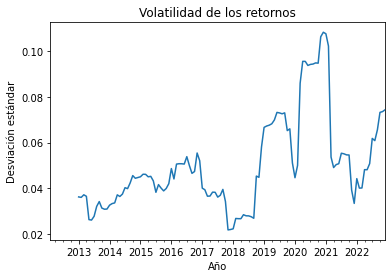

In [ ]:
Rrroll=Rr.rolling(window=12).std()
Rrroll.plot(xlabel="Año", ylabel="Desviación estándar",title="Volatilidad de los retornos");

[*********************100%***********************]  1 of 1 completed


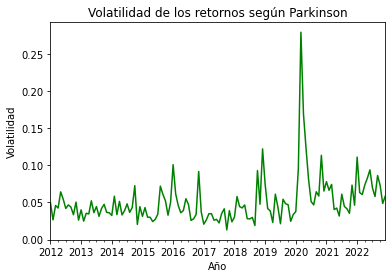

In [ ]:
#Paso 3. Calcular la volatilidad de Rusell con Parkinson. 
#No se filtra por precio ajustado porque trabaja con los precios de cierre y apertura
Pr=yf.download("^RUT", start="2011-12-31", end="2022-12-31",interval="1Mo").dropna()
lnR=np.log(Pr["High"]/Pr["Low"]).dropna()
SRP=((1/(4*np.log(2)))*lnR**2)**0.5
SRP.plot(xlabel="Año",ylabel="Volatilidad",title="Volatilidad de los retornos según Parkinson",c="g");



In [ ]:
#Volatilidad anualizada de Parkinson
SRP.mean()*np.sqrt(12)

0.17702537362965717

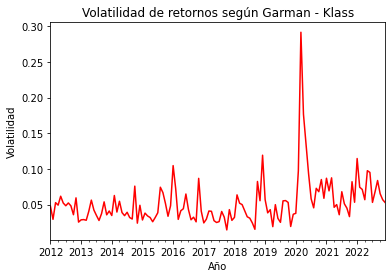

In [ ]:
#Paso 4. Calcular la volatilidad de Rusell con Garman- Klass
lnCOR=np.log(Pr["Close"]/Pr["Open"]).dropna()
SGKR=(0.5*lnR**2-(2*np.log(2)-1)*lnCOR**2)**0.5
SGKR.plot(xlabel="Año",ylabel="Volatilidad",title="Volatilidad de retornos según Garman - Klass",c="r");

In [ ]:
#Volatilidades anualizadas
SGKR.mean()*np.sqrt(12)

0.18169091631978984

In [ ]:
#Paso 5. Calcular la volatilidad de Rusell con EWMA, asumiendo un lambda de 0.94

In [ ]:
def ewma_vol(retornos,Lambda):
  Lambda=0.94
  k= len(retornos)
  td= np.arange(k-1,-1,-1)
  alpha=Lambda**td
  var_s=alpha*retornos**2
  var_s=var_s.sum()
  var_s=var_s*(1-Lambda)
  vol_ewma=np.sqrt(var_s)
  return(vol_ewma)

In [ ]:
pr=yf.download("^RUT", start="2011-12-31", end="2022-12-31",interval="1Mo")["Adj Close"]
rr=np.log(pr/pr.shift(1)).dropna()
ewma_vol(rr,Lambda=0.94)

[*********************100%***********************]  1 of 1 completed


0.06830708248540157

In [ ]:
#Volatilidades anualizadas
ewma_vol(rr,Lambda=0.94)*np.sqrt(12)

0.2366226747630274